In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q datasets flash_attn timm einops peft wandb deepspeed accelerate bitsandbytes decord tensorboardX gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 74.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 68.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 120.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
%cd /content/drive/MyDrive/NLP/Bai2

/content/drive/MyDrive/NLP/Bai2


In [4]:
!git clone https://github.com/5CD-AI/Vintern.git
%cd /content/drive/MyDrive/NLP/Bai2/Vintern

Cloning into 'Vintern'...
remote: Enumerating objects: 2339, done.
remote: Total 2339 (delta 0), reused 0 (delta 0), pack-reused 2339 (from 1)
Receiving objects: 100% (2339/2339), 36.44 MiB | 7.40 MiB/s, done.
Resolving deltas: 100% (1340/1340), done.
Updating files: 100% (650/650), done.
/content/drive/MyDrive/NLP/Bai2/Vintern


In [5]:
import pandas as pd
import json
import os
from uuid import uuid4
from PIL import Image

# **Load dataset**

In [6]:
# The following code will only execute
# successfully when compression is complete

import kagglehub

# Download latest version
path = kagglehub.dataset_download("tronggg/data-nlp-bai-2")

print("Path to dataset files:", path)

100%|██████████| 4.31G/4.31G [00:49<00:00, 92.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tronggg/data-nlp-bai-2/versions/5


In [7]:
root_dir = "/root/.cache/kagglehub/datasets/tronggg/data-nlp-bai-2/versions/5/Data_genarative/Data_genarative"
df_1 = pd.DataFrame()
for path in os.listdir(root_dir):
  df = pd.read_csv(os.path.join(root_dir, path))
  df_1 = pd.concat([df, df_1])
df_1

,image_path,description,question,answer
0,22748.jpg,"Bức ảnh là một phần của tài liệu in, hiển thị ...",Phương pháp nào được minh họa trong hình 7-1 c...,Hình ảnh 7-1 mô tả phương pháp cầm máu tạm thờ...
1,22748.jpg,"Bức ảnh là một phần của tài liệu in, hiển thị ...",Hình ảnh 7-1 trong ảnh trình bày loại kỹ thuật...,Hình ảnh 7-1 mô tả phương pháp cầm máu tạm thờ...
2,22749.jpg,Bức ảnh được chia thành 3 phần chính. Phần đầu...,"Ở phần đầu tiên này, con ếch ở hình ảnh bên tr...",Chú ếch trong hình minh họa bên trái đang ngồi...
3,22749.jpg,Bức ảnh được chia thành 3 phần chính. Phần đầu...,Hành động của chú ếch ở bức tranh bên trái là ...,Chú ếch trong hình minh họa bên trái đang ngồi...
4,22749.jpg,Bức ảnh được chia thành 3 phần chính. Phần đầu...,Phần hai chứa tổng cộng mấy ảnh và từng ảnh th...,Trong phần thứ hai có 3 hình ảnh. Hình ảnh thứ...
...,...,...,...,...
4977,953.jpg,"Bức ảnh là một trang sách với tiêu đề ""LỜI NÓI...",Việc chuẩn bị tài liệu này bao gồm các bước nào?,Tài liệu được biên soạn theo bốn hoạt động: Kh...
4978,953.jpg,"Bức ảnh là một trang sách với tiêu đề ""LỜI NÓI...",Tác giả viết tài liệu này nhằm mục đích gì?,Tác giả mong muốn cuốn sách đáp ứng được những...
4979,953.jpg,"Bức ảnh là một trang sách với tiêu đề ""LỜI NÓI...",Đâu là thông điệp chính mà tác giả muốn truyền...,Tác giả mong muốn cuốn sách đáp ứng được những...
4980,953.jpg,"Bức ảnh là một trang sách với tiêu đề ""LỜI NÓI...",Phần mở đầu tài liệu chủ yếu đề cập đến vấn đề...,Nội dung chính của phần giới thiệu về tài liệu...


In [8]:
root_dir = "/root/.cache/kagglehub/datasets/tronggg/data-nlp-bai-2/versions/5/data"
df_2 = pd.DataFrame()
for path in os.listdir(root_dir):
  df = pd.read_csv(os.path.join(root_dir, path))
  df_2 = pd.concat([df, df_2])
df_2

,image_path,description,question,answer
0,30018.jpg,"Bức ảnh là một phần của tài liệu in, chứa nội...",Sự phát triển của văn học chữ Hán và chữ Nôm t...,Sự phát triển của văn học chữ Hán và chữ Nôm t...
1,30018.jpg,"Bức ảnh là một phần của tài liệu in, chứa nội...",Có thể nêu ví dụ về các tác phẩm tiêu bi...,Các tác phẩm tiêu biểu của văn học chữ Nôm tro...
2,30019.jpg,"Ảnh chụp một phần của tài liệu học tập, có hai...","Theo quy hoạch của Bộ Công nghiệp (năm 2001), ...","Theo quy hoạch của Bộ Công nghiệp (năm 2001), ..."
3,30019.jpg,"Ảnh chụp một phần của tài liệu học tập, có hai...",Liệt kê các tỉnh thuộc vùng công nghiệp 1?,Vùng 1: Các tỉnh thuộc Trung du và miền núi Bắ...
4,30019.jpg,"Ảnh chụp một phần của tài liệu học tập, có hai...",Vùng công nghiệp 2 bao gồm những tỉnh nào?,Vùng 2: Các tỉnh thuộc Đồng bằng sông Hồng và ...
...,...,...,...,...
29995,12005.jpg,Bức ảnh bao gồm 4 phần chính. Phần 1 trình bày...,Làm cách nào để xác định năng lượng liên kết c...,Để xác định năng lượng liên kết của các liên k...
29996,12006.jpg,"Bức ảnh hiển thị một phần tài liệu khoa học, c...",Nêu các bước cần làm trong thí nghiệm này?,Các bước cần làm trong thí nghiệm này được nêu...
29997,12006.jpg,"Bức ảnh hiển thị một phần tài liệu khoa học, c...","Theo bạn, thí nghiệm này muốn tìm hiểu điều gì?","Dựa vào nội dung phần hướng dẫn, có thể thấy t..."
29998,12006.jpg,"Bức ảnh hiển thị một phần tài liệu khoa học, c...",Tại sao cần phải ghi chép số liệu của các lần ...,Ghi chép số liệu của các lần thí nghiệm là rất...


In [9]:
df_1 = pd.concat([df_1, df_2])
df_1 = df_1.drop_duplicates()
df_1 = df_1.reset_index(drop=True)
df_1

,image_path,description,question,answer
0,22748.jpg,"Bức ảnh là một phần của tài liệu in, hiển thị ...",Phương pháp nào được minh họa trong hình 7-1 c...,Hình ảnh 7-1 mô tả phương pháp cầm máu tạm thờ...
1,22748.jpg,"Bức ảnh là một phần của tài liệu in, hiển thị ...",Hình ảnh 7-1 trong ảnh trình bày loại kỹ thuật...,Hình ảnh 7-1 mô tả phương pháp cầm máu tạm thờ...
2,22749.jpg,Bức ảnh được chia thành 3 phần chính. Phần đầu...,"Ở phần đầu tiên này, con ếch ở hình ảnh bên tr...",Chú ếch trong hình minh họa bên trái đang ngồi...
3,22749.jpg,Bức ảnh được chia thành 3 phần chính. Phần đầu...,Hành động của chú ếch ở bức tranh bên trái là ...,Chú ếch trong hình minh họa bên trái đang ngồi...
4,22749.jpg,Bức ảnh được chia thành 3 phần chính. Phần đầu...,Phần hai chứa tổng cộng mấy ảnh và từng ảnh th...,Trong phần thứ hai có 3 hình ảnh. Hình ảnh thứ...
...,...,...,...,...
444073,12005.jpg,Bức ảnh bao gồm 4 phần chính. Phần 1 trình bày...,Làm cách nào để xác định năng lượng liên kết c...,Để xác định năng lượng liên kết của các liên k...
444074,12006.jpg,"Bức ảnh hiển thị một phần tài liệu khoa học, c...",Nêu các bước cần làm trong thí nghiệm này?,Các bước cần làm trong thí nghiệm này được nêu...
444075,12006.jpg,"Bức ảnh hiển thị một phần tài liệu khoa học, c...","Theo bạn, thí nghiệm này muốn tìm hiểu điều gì?","Dựa vào nội dung phần hướng dẫn, có thể thấy t..."
444076,12006.jpg,"Bức ảnh hiển thị một phần tài liệu khoa học, c...",Tại sao cần phải ghi chép số liệu của các lần ...,Ghi chép số liệu của các lần thí nghiệm là rất...


In [10]:
root_dir = '/root/.cache/kagglehub/datasets/tronggg/data-nlp-bai-2/versions/5/img/img'
df = df_1.copy()
# df = df.iloc[0:10000]
df = df.rename({"image_path": "image_id"}, axis = 1)
df["image_path"] = df['image_id'].apply(lambda x: os.path.join(root_dir, x))
df["image_id"] = df["image_id"].str.split(".").str[0]
df = df.dropna(subset=['question','answer']).copy()
df['question'] = df['question'].astype(str)
df['answer'] = df['answer'].astype(str)
df.drop(['description'], axis = 1, inplace = True)
df.reset_index(inplace=True)
df = df.drop(["image_id"], axis = 1)
df = df.rename({"index": "id", "answer": "answers", "image_path": "image_id"}, axis = 1)
df

,id,question,answers,image_id
0,0,Phương pháp nào được minh họa trong hình 7-1 c...,Hình ảnh 7-1 mô tả phương pháp cầm máu tạm thờ...,/root/.cache/kagglehub/datasets/tronggg/data-n...
1,1,Hình ảnh 7-1 trong ảnh trình bày loại kỹ thuật...,Hình ảnh 7-1 mô tả phương pháp cầm máu tạm thờ...,/root/.cache/kagglehub/datasets/tronggg/data-n...
2,2,"Ở phần đầu tiên này, con ếch ở hình ảnh bên tr...",Chú ếch trong hình minh họa bên trái đang ngồi...,/root/.cache/kagglehub/datasets/tronggg/data-n...
3,3,Hành động của chú ếch ở bức tranh bên trái là ...,Chú ếch trong hình minh họa bên trái đang ngồi...,/root/.cache/kagglehub/datasets/tronggg/data-n...
4,4,Phần hai chứa tổng cộng mấy ảnh và từng ảnh th...,Trong phần thứ hai có 3 hình ảnh. Hình ảnh thứ...,/root/.cache/kagglehub/datasets/tronggg/data-n...
...,...,...,...,...
439186,444073,Làm cách nào để xác định năng lượng liên kết c...,Để xác định năng lượng liên kết của các liên k...,/root/.cache/kagglehub/datasets/tronggg/data-n...
439187,444074,Nêu các bước cần làm trong thí nghiệm này?,Các bước cần làm trong thí nghiệm này được nêu...,/root/.cache/kagglehub/datasets/tronggg/data-n...
439188,444075,"Theo bạn, thí nghiệm này muốn tìm hiểu điều gì?","Dựa vào nội dung phần hướng dẫn, có thể thấy t...",/root/.cache/kagglehub/datasets/tronggg/data-n...
439189,444076,Tại sao cần phải ghi chép số liệu của các lần ...,Ghi chép số liệu của các lần thí nghiệm là rất...,/root/.cache/kagglehub/datasets/tronggg/data-n...


In [11]:
import pandas as pd

# Hàm xử lý câu trả lời: chuyển danh sách thành chuỗi
def format_answer(answer):
    if isinstance(answer, list):
        return ", ".join(answer)
    return str(answer)

# Hàm tạo conversations từ một nhóm dữ liệu
def create_conversations(group):
    conversations = []
    for _, row in group.iterrows():
        conversations.append({
            "from": "human",
            "value": row['question']
        })
        conversations.append({
            "from": "gpt",
            "value": format_answer(row['answers'])
        })
    return conversations

# Tạo mapping từ image_id đến id (chọn id đầu tiên cho mỗi image_id)
id_mapping = df.groupby('image_id')['id'].first().to_dict()

# Nhóm theo image_id và tạo conversations
grouped = df.groupby('image_id').apply(create_conversations, include_groups=False).reset_index(name='conversations')

# Thêm cột id từ mapping
grouped['id'] = grouped['image_id'].map(id_mapping)

# Tạo DataFrame kết quả với ba cột: id, image, conversations
df_train = grouped[['id', 'image_id', 'conversations']].rename(columns={'image_id': 'image'})

df_train

,id,image,conversations
0,23218,/root/.cache/kagglehub/datasets/tronggg/data-n...,"[{'from': 'human', 'value': 'Môn học được đề c..."
1,23228,/root/.cache/kagglehub/datasets/tronggg/data-n...,"[{'from': 'human', 'value': '""Ví dụ 2"", câu a)..."
2,23318,/root/.cache/kagglehub/datasets/tronggg/data-n...,"[{'from': 'human', 'value': 'Giai đoạn đầu tiê..."
3,24216,/root/.cache/kagglehub/datasets/tronggg/data-n...,"[{'from': 'human', 'value': 'Câu hỏi thứ tư bà..."
4,55670,/root/.cache/kagglehub/datasets/tronggg/data-n...,"[{'from': 'human', 'value': 'Ảnh tạo bởi thấu ..."
...,...,...,...
51851,434020,/root/.cache/kagglehub/datasets/tronggg/data-n...,"[{'from': 'human', 'value': 'Theo văn bản, tại..."
51852,434025,/root/.cache/kagglehub/datasets/tronggg/data-n...,"[{'from': 'human', 'value': 'Hình ảnh minh họa..."
51853,434030,/root/.cache/kagglehub/datasets/tronggg/data-n...,"[{'from': 'human', 'value': 'Trong thi đấu đơn..."
51854,434035,/root/.cache/kagglehub/datasets/tronggg/data-n...,"[{'from': 'human', 'value': 'A-ri-ôn là ai? A-..."


In [12]:
df_train['image'][3]

'/root/.cache/kagglehub/datasets/tronggg/data-nlp-bai-2/versions/5/img/img/100.jpg'

In [13]:
df_train = df_train.iloc[0:1000]
df_train

,id,image,conversations
0,23218,/root/.cache/kagglehub/datasets/tronggg/data-n...,"[{'from': 'human', 'value': 'Môn học được đề c..."
1,23228,/root/.cache/kagglehub/datasets/tronggg/data-n...,"[{'from': 'human', 'value': '""Ví dụ 2"", câu a)..."
2,23318,/root/.cache/kagglehub/datasets/tronggg/data-n...,"[{'from': 'human', 'value': 'Giai đoạn đầu tiê..."
3,24216,/root/.cache/kagglehub/datasets/tronggg/data-n...,"[{'from': 'human', 'value': 'Câu hỏi thứ tư bà..."
4,55670,/root/.cache/kagglehub/datasets/tronggg/data-n...,"[{'from': 'human', 'value': 'Ảnh tạo bởi thấu ..."
...,...,...,...
995,148104,/root/.cache/kagglehub/datasets/tronggg/data-n...,"[{'from': 'human', 'value': 'Bảng thống kê này..."
996,148114,/root/.cache/kagglehub/datasets/tronggg/data-n...,"[{'from': 'human', 'value': 'Địa điểm tọa lạc ..."
997,148124,/root/.cache/kagglehub/datasets/tronggg/data-n...,"[{'from': 'human', 'value': 'Quyển sách này có..."
998,148134,/root/.cache/kagglehub/datasets/tronggg/data-n...,"[{'from': 'human', 'value': 'Chủ đề chính của ..."


In [14]:
import pandas as pd
from PIL import Image
from datasets import Dataset
from tqdm import tqdm
import gc

def safe_convert_to_rgb(image_path, max_size=(512, 512)):
    try:
        img = Image.open(image_path)
        if img.mode == 'P' and 'transparency' in img.info:
            img = img.convert('RGBA')
        img = img.convert('RGB')
        img.thumbnail(max_size)
        return img
    except Exception as e:
        print(f"Lỗi khi mở hình ảnh {image_path}: {e}")
        return None

# Giả định df_train là DataFrame chứa dữ liệu đầu vào
batch_size = 1000
examples = []

# Lặp qua DataFrame theo batch
for start in tqdm(range(0, len(df_train), batch_size), desc="Xử lý batch"):
    end = min(start + batch_size, len(df_train))
    batch_df = df_train.iloc[start:end]

    for _, row in batch_df.iterrows():
        image_path = row['image']  # Lấy đường dẫn hình ảnh từ cột 'image_id'
        image = safe_convert_to_rgb(image_path, max_size=(512, 512))
        if image is None:
            continue

        # Tạo dictionary cho mỗi mẫu
        example = {
            'id': row['id'],
            'image': image,
            'conversations': row['conversations'],
        }
        examples.append(example)

    # Giải phóng bộ nhớ sau mỗi batch
    gc.collect()

# Chuyển danh sách thành Dataset
dataset = Dataset.from_list(examples)

print("Chuyển đổi hoàn tất. Dataset đã sẵn sàng để sử dụng.")

Xử lý batch: 100%|██████████| 1/1 [00:14<00:00, 14.21s/it]


Chuyển đổi hoàn tất. Dataset đã sẵn sàng để sử dụng.


In [15]:
dataset

Dataset({
    features: ['id', 'image', 'conversations'],
    num_rows: 1000
})

In [16]:
dataset[0]

{'id': 23218,
 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=357x512>,
 'conversations': [{'from': 'human',
   'value': 'Môn học được đề cập đến trong cuốn sách ở ảnh là gì?'},
  {'from': 'gpt', 'value': 'Cuốn sách trong ảnh thuộc bộ môn Ngữ văn.'},
  {'from': 'human',
   'value': 'Ảnh chụp cuốn sách này liên quan đến lĩnh vực học tập nào?'},
  {'from': 'gpt', 'value': 'Cuốn sách trong ảnh thuộc bộ môn Ngữ văn.'},
  {'from': 'human', 'value': 'Sách này phù hợp với trình độ học vấn nào?'},
  {'from': 'gpt', 'value': 'Cuốn sách dành cho học sinh lớp 12.'},
  {'from': 'human', 'value': 'Đối tượng độc giả của cuốn sách này là ai?'},
  {'from': 'gpt', 'value': 'Cuốn sách dành cho học sinh lớp 12.'},
  {'from': 'human',
   'value': 'Ấn bản này của cuốn sách là lần xuất bản thứ bao nhiêu?'},
  {'from': 'gpt', 'value': 'Cuốn sách được in lần thứ ba.'},
  {'from': 'human', 'value': 'Đây là lần tái bản thứ mấy của cuốn sách này?'},
  {'from': 'gpt', 'value': 'Cuốn sách được in lầ

# **Prepare model**

## Download model

Before starting the second fine-tuning, download the pre-trained model is provided.

In [17]:
!mkdir -p pretrained
%cd pretrained/
# Download 5CD-AI/Vintern-1B-v2 ---- Vision Part:InternViT‑300M‑448px + Language Part: Qwen2‑0.5B‑Instruct
!huggingface-cli download --resume-download --local-dir-use-symlinks False 5CD-AI/Vintern-1B-v2 --local-dir Vintern-1B-v2

/content/drive/MyDrive/NLP/Bai2/Vintern/pretrained
/usr/local/lib/python3.11/dist-packages/huggingface_hub/commands/download.py:139: FutureWarning: Ignoring --local-dir-use-symlinks. Downloading to a local directory does not use symlinks anymore.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Fetching 22 files:   0% 0/22 [00:00<?, ?it/s]Still waiting to acquire lock on Vintern-1B-v2/.cache/huggingface/.gitignore.lock (elapsed: 0.1 seconds)
Still waiting to acquire lock on Vintern-1B-v2/.cache/huggingface/.gitignore.lock (elapsed: 0.1 seconds)

Vintern_logo.png:   0% 0.00/2.12M [00:00<?, ?B/s]Downloading 'README.md' to 'Vintern-1B-v2/.cache/huggingface/download/Xn7B-BWUGOee2Y6hCZtEhtFu4BE=.aa4d6f7ad5fa428d00c664d2043212026d27016d.incomple

## Test single image

Let's do inference with our dataset first to see how the model performs already with our dataset before fine-tuning. After testing you should clear the gpu (restart session) for next steps.

In [18]:
#### Do not use flash attention if your device not support

# import json
# with open('pretrained/InternVL2-1B/config.json', 'r') as f:
#     config = json.load(f)
# config["vision_config"]["use_flash_attn"] = False
# with open('pretrained/InternVL2-1B/config.json', 'w') as f:
#     json.dump(config, f)

In [19]:
import os
import numpy as np
import torch
import torchvision.transforms as T
from PIL import Image
from torchvision.transforms.functional import InterpolationMode
from transformers import AutoModel, AutoTokenizer
import matplotlib.pyplot as plt

IMAGENET_MEAN = (0.485, 0.456, 0.406)
IMAGENET_STD = (0.229, 0.224, 0.225)

def build_transform(input_size):
    MEAN, STD = IMAGENET_MEAN, IMAGENET_STD
    transform = T.Compose([
        T.Lambda(lambda img: img.convert('RGB') if img.mode != 'RGB' else img),
        T.Resize((input_size, input_size), interpolation=InterpolationMode.BICUBIC),
        T.ToTensor(),
        T.Normalize(mean=MEAN, std=STD)
    ])
    return transform

def find_closest_aspect_ratio(aspect_ratio, target_ratios, width, height, image_size):
    best_ratio_diff = float('inf')
    best_ratio = (1, 1)
    area = width * height
    for ratio in target_ratios:
        target_aspect_ratio = ratio[0] / ratio[1]
        ratio_diff = abs(aspect_ratio - target_aspect_ratio)
        if ratio_diff < best_ratio_diff:
            best_ratio_diff = ratio_diff
            best_ratio = ratio
        elif ratio_diff == best_ratio_diff:
            if area > 0.5 * image_size * image_size * ratio[0] * ratio[1]:
                best_ratio = ratio
    return best_ratio

def dynamic_preprocess(image, min_num=1, max_num=12, image_size=448, use_thumbnail=False):
    orig_width, orig_height = image.size
    aspect_ratio = orig_width / orig_height

    # calculate the existing image aspect ratio
    target_ratios = set(
        (i, j) for n in range(min_num, max_num + 1) for i in range(1, n + 1) for j in range(1, n + 1) if
        i * j <= max_num and i * j >= min_num)
    target_ratios = sorted(target_ratios, key=lambda x: x[0] * x[1])

    # find the closest aspect ratio to the target
    target_aspect_ratio = find_closest_aspect_ratio(
        aspect_ratio, target_ratios, orig_width, orig_height, image_size)

    # calculate the target width and height
    target_width = image_size * target_aspect_ratio[0]
    target_height = image_size * target_aspect_ratio[1]
    blocks = target_aspect_ratio[0] * target_aspect_ratio[1]

    # resize the image
    resized_img = image.resize((target_width, target_height))
    processed_images = []
    for i in range(blocks):
        box = (
            (i % (target_width // image_size)) * image_size,
            (i // (target_width // image_size)) * image_size,
            ((i % (target_width // image_size)) + 1) * image_size,
            ((i // (target_width // image_size)) + 1) * image_size
        )
        # split the image
        split_img = resized_img.crop(box)
        processed_images.append(split_img)
    assert len(processed_images) == blocks
    if use_thumbnail and len(processed_images) != 1:
        thumbnail_img = image.resize((image_size, image_size))
        processed_images.append(thumbnail_img)
    return processed_images

def load_image(image_file, input_size=448, max_num=12):
    #check image_file is a path or image
    if isinstance(image_file, str):
        image = Image.open(image_file).convert('RGB')
    else:
        image = image_file
    transform = build_transform(input_size=input_size)
    images = dynamic_preprocess(image, image_size=input_size, use_thumbnail=True, max_num=max_num)
    pixel_values = [transform(image) for image in images]
    pixel_values = torch.stack(pixel_values)
    return pixel_values

In [20]:
## load pretrained model
model_name = "/content/drive/MyDrive/NLP/Bai2/Vintern/pretrained/Vintern-1B-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True, use_fast=False)
model = AutoModel.from_pretrained(
    model_name,
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    trust_remote_code=True
).eval().cuda()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


configuration_internvl_chat.py:   0%|          | 0.00/3.80k [00:00<?, ?B/s]

configuration_intern_vit.py:   0%|          | 0.00/5.55k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/5CD-AI/Vintern-1B-v2:
- configuration_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/5CD-AI/Vintern-1B-v2:
- configuration_internvl_chat.py
- configuration_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_internvl_chat.py:   0%|          | 0.00/15.2k [00:00<?, ?B/s]

conversation.py:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/5CD-AI/Vintern-1B-v2:
- conversation.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_intern_vit.py:   0%|          | 0.00/18.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/5CD-AI/Vintern-1B-v2:
- modeling_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/5CD-AI/Vintern-1B-v2:
- modeling_internvl_chat.py
- conversation.py
- modeling_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


[2025-05-17 02:50:48,175] [INFO] [real_accelerator.py:239:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


In [21]:
# ### Test samples
# for i in range(3):
#     image = dataset[i]['image']

#     plt.figure(figsize=(5,5))
#     plt.imshow(image)
#     plt.show()

#     pixel_values = load_image(image, max_num=12).to(torch.bfloat16).cuda()
#     generation_config = dict(max_new_tokens= 1024, do_sample=False, num_beams = 3, repetition_penalty=2.0)

#     question = '<image>\nTrích xuất thông tin hoá đơn trong ảnh.'

#     response = model.chat(tokenizer, pixel_values, question, generation_config)
#     print(f'User: {question}\nAssistant: {response}')
#     print("="*30)

In [22]:
torch.cuda.empty_cache()

# **Prepare Your Customized Training Data**

In [23]:
%cd /content/drive/MyDrive/NLP/Bai2

/content/drive/MyDrive/NLP/Bai2


## Single-Image Data
First you need to create a dataset json file to describe each item of your dataset

For single-image data, we use a **JSONL** file to store the data. Each entry is a dictionary organized in the following format. Note that each entry for single-image data must contain an image field, which is a string.

The path in the image field is relative to the root field. Concatenating the root field and the image field gives the complete path to the image. It is recommended to include width and height information for each data sample for future use.
```
{
  "id": 0,
  "image": "path/to/image.jpg",
  "width": 111,
  "height": 222,
  "conversations": [
    {"from": "human", "value": "<image>\nuser input"},
    {"from": "gpt", "value": "assistant output"},
    {"from": "human", "value": "user input"},
    {"from": "gpt", "value": "assistant output"}
  ]
}
```

Save image to image folder to get image_path to follow format of dataset

In [24]:
import os
from tqdm import tqdm
FOLDER_IMAGES = "/content/drive/MyDrive/NLP/Bai2/ViTextVQAResized"
os.makedirs(FOLDER_IMAGES, exist_ok=True)

In [25]:

### Save image dataset
for i in tqdm(range(len(dataset))):
    image = dataset[i]['image']
    id = dataset[i]['id']

    #resize 448x448
    image = image.resize((448, 448)) # Just for saving vram
    image.save(f"{FOLDER_IMAGES}/{id}.jpg")

100%|██████████| 1000/1000 [00:21<00:00, 46.06it/s]


Format each item data follow format above

In [38]:
import json

all_data = []

for item in tqdm(dataset):
    # Just 500 items for example
    if len(all_data) >= 500:
        break
    id = item['id']
    image = f"{FOLDER_IMAGES}/{item['id']}.jpg"
    width = item['image'].width
    height = item['image'].height
    conversations = item['conversations']
    data = {
        "id": id,
        "image": image,
        "width": width,
        "height": height,
        "conversations": conversations
    }
    all_data.append(data)

print(len(all_data))
print(all_data[0:5])

 50%|█████     | 500/1000 [00:01<00:01, 256.04it/s]

500
[{'id': 23218, 'image': '/content/drive/MyDrive/NLP/Bai2/ViTextVQAResized/23218.jpg', 'width': 357, 'height': 512, 'conversations': [{'from': 'human', 'value': 'Môn học được đề cập đến trong cuốn sách ở ảnh là gì?'}, {'from': 'gpt', 'value': 'Cuốn sách trong ảnh thuộc bộ môn Ngữ văn.'}, {'from': 'human', 'value': 'Ảnh chụp cuốn sách này liên quan đến lĩnh vực học tập nào?'}, {'from': 'gpt', 'value': 'Cuốn sách trong ảnh thuộc bộ môn Ngữ văn.'}, {'from': 'human', 'value': 'Sách này phù hợp với trình độ học vấn nào?'}, {'from': 'gpt', 'value': 'Cuốn sách dành cho học sinh lớp 12.'}, {'from': 'human', 'value': 'Đối tượng độc giả của cuốn sách này là ai?'}, {'from': 'gpt', 'value': 'Cuốn sách dành cho học sinh lớp 12.'}, {'from': 'human', 'value': 'Ấn bản này của cuốn sách là lần xuất bản thứ bao nhiêu?'}, {'from': 'gpt', 'value': 'Cuốn sách được in lần thứ ba.'}, {'from': 'human', 'value': 'Đây là lần tái bản thứ mấy của cuốn sách này?'}, {'from': 'gpt', 'value': 'Cuốn sách được in lầ

In [39]:
### Write JSONL line
with open('/content/drive/MyDrive/NLP/Bai2/Vintern/internvl_chat/shell/data/ViTextVQA.jsonl', 'w', encoding='utf-8') as f:
    for data in tqdm(all_data):
        f.write(json.dumps(data, ensure_ascii=False) + '\n')

100%|██████████| 500/500 [00:00<00:00, 7206.53it/s]


## Create meta file to manage the meta information of all datasets

After downloading the pre-trained model, prepare your customized SFT (Supervised Fine-Tuning) data. Create a JSON file in `internvl_chat/shell/data/` similar to [this example](https://github.com/OpenGVLab/InternVL/blob/main/internvl_chat/shell/data/internvl_1_2_finetune.json)

The format for the JSON file should be:

```
{
  "your-custom-dataset-1": {
    "root": "path/to/the/image/",
    "annotation": "path/to/the/jsonl/annotation",
    "data_augment": false,
    "repeat_time": 1,
    "length": "number of your data"
  },
  ...
}```



In [40]:
metadata_datasets = {
  "vi-text-vqa": {
    "root": "/content/drive/MyDrive/NLP/Bai2/ViTextVQAResized",
    "annotation": "/content/drive/MyDrive/NLP/Bai2/Vintern/internvl_chat/shell/data/ViTextVQA.jsonl",
    "data_augment": False,
    "repeat_time": 1,
    "length": 500
  }
}

with open('/content/drive/MyDrive/NLP/Bai2/Vintern/internvl_chat/shell/data/custom_fintune_datasets.json', 'w', encoding='utf-8') as f:
    json.dump(metadata_datasets, f, ensure_ascii=False, indent=4)


# Training

## LoRA fine-tuning

Fine-tune the pre-trained models using either the script for training the [full LLM](https://internvl.readthedocs.io/en/latest/internvl2.0/finetune.html#:~:text=script%20for%20training%20the%20full%20LLM) or the script for training the [LoRA adapter](https://github.com/OpenGVLab/InternVL/blob/main/internvl_chat/shell/internvl2.0/2nd_finetune/internvl2_1b_qwen2_0_5b_dynamic_res_2nd_finetune_lora.sh), depending on your available GPU resources.

Before fine-tuning, set the --meta_path to the path of the JSON file you created in the previous step. The default pre-trained model path in these shell scripts is ./pretrained/InternVL2-1B.

In the default settings, I have frozen the visual encoder. You can unfreeze it if needed. Generally, unfreezing the visual encoder will result in better performance.



Edit file `InternVL/internvl_chat/shell/internvl2.0/2nd_finetune/internvl2_1b_qwen2_0_5b_dynamic_res_2nd_finetune_lora.sh` for train LoRA LLM follow example below

In [41]:
train_bash_content = '''set -x

GPUS=${GPUS:-1}
BATCH_SIZE=${BATCH_SIZE:-1}
PER_DEVICE_BATCH_SIZE=${PER_DEVICE_BATCH_SIZE:-1}
GRADIENT_ACC=$((BATCH_SIZE / PER_DEVICE_BATCH_SIZE / GPUS))


export PYTHONPATH="${PYTHONPATH}:$(pwd)"
export MASTER_PORT=34229
export TF_CPP_MIN_LOG_LEVEL=3
export LAUNCHER=pytorch

OUTPUT_DIR='/content/drive/MyDrive/NLP/Bai2/work_dirs/internvl_chat_v2_0/Vintern_1B_v2_finetune_lora_vi_text_vqa'

if [ ! -d "$OUTPUT_DIR" ]; then
  mkdir -p "$OUTPUT_DIR"
fi

# number of gpus: 2
# batch size per gpu: 4
# gradient accumulation steps: 2
# total batch size: 16
# epoch: 1
torchrun \
  --nnodes=1 \
  --node_rank=0 \
  --master_addr=127.0.0.1 \
  --nproc_per_node=${GPUS} \
  --master_port=${MASTER_PORT} \
  internvl/train/internvl_chat_finetune.py \
  --model_name_or_path "/content/drive/MyDrive/NLP/Bai2/Vintern/pretrained/Vintern-1B-v2" \
  --conv_style "Hermes-2" \
  --output_dir ${OUTPUT_DIR} \
  --meta_path "/content/drive/MyDrive/NLP/Bai2/Vintern/internvl_chat/shell/data/custom_fintune_datasets.json" \
  --overwrite_output_dir True \
  --force_image_size 448 \
  --max_dynamic_patch 6 \
  --down_sample_ratio 0.5 \
  --drop_path_rate 0.0 \
  --freeze_llm True \
  --freeze_mlp True \
  --freeze_backbone True \
  --use_llm_lora 16 \
  --vision_select_layer -1 \
  --dataloader_num_workers 4 \
  --bf16 True \
  --num_train_epochs 1 \
  --per_device_train_batch_size ${PER_DEVICE_BATCH_SIZE} \
  --gradient_accumulation_steps ${GRADIENT_ACC} \
  --save_strategy "steps" \
  --save_steps 500 \
  --save_total_limit 2 \
  --learning_rate 4e-5 \
  --weight_decay 0.01 \
  --warmup_ratio 0.03 \
  --lr_scheduler_type "cosine" \
  --logging_steps 10 \
  --max_seq_length 700 \
  --do_train True \
  --grad_checkpoint True \
  --group_by_length True \
  --dynamic_image_size True \
  --use_thumbnail True \
  --ps_version 'v2' \
  --deepspeed "zero_stage1_config.json" \
  --report_to "tensorboard" \
  2>&1 | tee -a "${OUTPUT_DIR}/training_log.txt"
'''

In [42]:
with open("/content/drive/MyDrive/NLP/Bai2/Vintern/internvl_chat/shell/internvl2.0/2nd_finetune/internvl2_1b_qwen2_0_5b_dynamic_res_2nd_finetune_lora.sh", "w") as text_file:
    text_file.write(train_bash_content)

In [43]:
!ls -l /content/drive/MyDrive/NLP/Bai2/ViTextVQAResized/
!chmod -R +r /content/drive/MyDrive/NLP/Bai2/ViTextVQAResized/

total 29520
-rw------- 1 root root 32984 May 17 02:51 146204.jpg
-rw------- 1 root root 28715 May 17 02:51 146214.jpg
-rw------- 1 root root 18844 May 17 02:51 146224.jpg
-rw------- 1 root root 31392 May 17 02:51 146234.jpg
-rw------- 1 root root 37961 May 17 02:51 146244.jpg
-rw------- 1 root root 21316 May 17 02:51 146254.jpg
-rw------- 1 root root 29671 May 17 02:51 146264.jpg
-rw------- 1 root root 31254 May 17 02:51 146274.jpg
-rw------- 1 root root 37177 May 17 02:51 146284.jpg
-rw------- 1 root root 34551 May 17 02:51 146294.jpg
-rw------- 1 root root 25502 May 17 02:51 146304.jpg
-rw------- 1 root root 23721 May 17 02:51 146314.jpg
-rw------- 1 root root 31647 May 17 02:51 146324.jpg
-rw------- 1 root root 42441 May 17 02:51 146334.jpg
-rw------- 1 root root 20048 May 17 02:51 146344.jpg
-rw------- 1 root root 29986 May 17 02:51 146354.jpg
-rw------- 1 root root 27056 May 17 02:51 146364.jpg
-rw------- 1 root root 27657 May 17 02:51 146374.jpg
-rw------- 1 root root 36679 May 1

Let's go training. It take about just 15 minutes with T4

In [44]:
%cd /content/drive/MyDrive/NLP/Bai2/Vintern/internvl_chat
!sh shell/internvl2.0/2nd_finetune/internvl2_1b_qwen2_0_5b_dynamic_res_2nd_finetune_lora.sh

/content/drive/MyDrive/NLP/Bai2/Vintern/internvl_chat
+ GPUS=1
+ BATCH_SIZE=1
+ PER_DEVICE_BATCH_SIZE=1
+ GRADIENT_ACC=1
+ pwd
+ export PYTHONPATH=/env/python:/content/drive/MyDrive/NLP/Bai2/Vintern/internvl_chat
+ export MASTER_PORT=34229
+ export TF_CPP_MIN_LOG_LEVEL=3
+ export LAUNCHER=pytorch
+ OUTPUT_DIR=/content/drive/MyDrive/NLP/Bai2/work_dirs/internvl_chat_v2_0/Vintern_1B_v2_finetune_lora_vi_text_vqa
+ [ ! -d /content/drive/MyDrive/NLP/Bai2/work_dirs/internvl_chat_v2_0/Vintern_1B_v2_finetune_lora_vi_text_vqa ]
+ torchrun --nnodes=1 --node_rank=0 --master_addr=127.0.0.1 --nproc_per_node=1 --master_port=34229 internvl/train/internvl_chat_finetune.py --model_name_or_path /content/drive/MyDrive/NLP/Bai2/Vintern/pretrained/Vintern-1B-v2 --conv_style Hermes-2 --output_dir /content/drive/MyDrive/NLP/Bai2/work_dirs/internvl_chat_v2_0/Vintern_1B_v2_finetune_lora_vi_text_vqa --meta_path /content/drive/MyDrive/NLP/Bai2/Vintern/internvl_chat/shell/data/custom_fintune_datasets.json --overwr

In [45]:
import torch
torch.cuda.empty_cache()

## Merging LoRA Weights
After evaluating the fine-tuned model, you may want to merge the LoRA weights back into the original InternVL2 model. Follow these steps to accomplish this.

Use the provided script to merge the LoRA weights into the base model. The script takes two arguments: the input path of the fine-tuned model and the output path for the merged model.

`python tools/merge_lora.py <input_path> <output_path>`

In [46]:
merge_lora_content = '''import torch
import sys
sys.path.append("/content/drive/MyDrive/NLP/Bai2/Vintern/internvl_chat")
from internvl.model.internvl_chat import InternVLChatModel
from transformers import AutoTokenizer
import argparse

argparse = argparse.ArgumentParser()
argparse.add_argument("input_path", type=str, help="Path to the input model")
argparse.add_argument("output_path", type=str, help="Path to the output model")
args = argparse.parse_args()

print("Loading model...")
model = InternVLChatModel.from_pretrained(
    args.input_path, low_cpu_mem_usage=True, torch_dtype=torch.bfloat16).eval()
print("Loading tokenizer...")
tokenizer = AutoTokenizer.from_pretrained(args.input_path, trust_remote_code=True)

if model.config.use_backbone_lora:
    model.vision_model.merge_and_unload()
    model.vision_model = model.vision_model.model
    model.config.use_backbone_lora = 0
if model.config.use_llm_lora:
    model.language_model.merge_and_unload()
    model.language_model = model.language_model.model
    model.config.use_llm_lora = 0

print("Saving model...")
model.save_pretrained(args.output_path)
print("Saving tokenizer...")
tokenizer.save_pretrained(args.output_path)
print("Done!")
'''

with open("/content/drive/MyDrive/NLP/Bai2/Vintern/internvl_chat/tools/merge_lora.py", "w") as text_file:
    text_file.write(merge_lora_content)

In [47]:
### If could not import internvl edit add
### import sys
### sys.path.append("/content/Vintern/internvl_chat")

%cd /content/drive/MyDrive/NLP/Bai2/Vintern/internvl_chat
!python tools/merge_lora.py /content/drive/MyDrive/NLP/Bai2/work_dirs/internvl_chat_v2_0/Vintern_1B_v2_finetune_lora_vi_text_vqa \
                            /content/drive/MyDrive/NLP/Bai2/work_dirs/internvl_chat_v2_0/Vintern_1B_v2_finetune_lora_vi_text_vqa_merge

/content/drive/MyDrive/NLP/Bai2/Vintern/internvl_chat
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
2025-05-17 03:54:42.246647: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747454082.381319   21682 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747454082.414181   21682 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
[2025-05-17 03:54:48,396] [INFO] [real_accelerator.py:239:get_accelerator] Setting ds_accelerator to cuda (a

## Wrapping into AutoModel
After merging the LoRA weights, you can wrap the fine-tuned InternVL2 model into an AutoModel for easier inference or deployment.

First, copy all the Python scripts from the original InternVL2-2B directory to the new merged model directory:



In [48]:
!cp /content/drive/MyDrive/NLP/Bai2/Vintern/pretrained/Vintern-1B-v2/*.py \
    /content/drive/MyDrive/NLP/Bai2/work_dirs/internvl_chat_v2_0/Vintern_1B_v2_finetune_lora_vi_text_vqa_merge

Next, copy the config.json file from the original InternVL2-1B directory to the new merged model directory:

In [49]:
!cp /content/drive/MyDrive/NLP/Bai2/Vintern/pretrained/Vintern-1B-v2/config.json \
    /content/drive/MyDrive/NLP/Bai2/work_dirs/internvl_chat_v2_0/Vintern_1B_v2_finetune_lora_vi_text_vqa_merge

# Inference with fintuned model

After copying the necessary files, you can now load and use the fine-tuned InternVL2 model with AutoModel for inference

In [50]:
!pip install transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 114.7 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51.3:
      Successfully uninstalled transformers-4.51.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 4.1.0 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.37.2 which is incompatible.


In [51]:
import os
import numpy as np
import torch
import torchvision.transforms as T
from PIL import Image
from torchvision.transforms.functional import InterpolationMode
from transformers import AutoModel, AutoTokenizer
import matplotlib.pyplot as plt

IMAGENET_MEAN = (0.485, 0.456, 0.406)
IMAGENET_STD = (0.229, 0.224, 0.225)

def build_transform(input_size):
    MEAN, STD = IMAGENET_MEAN, IMAGENET_STD
    transform = T.Compose([
        T.Lambda(lambda img: img.convert('RGB') if img.mode != 'RGB' else img),
        T.Resize((input_size, input_size), interpolation=InterpolationMode.BICUBIC),
        T.ToTensor(),
        T.Normalize(mean=MEAN, std=STD)
    ])
    return transform

def find_closest_aspect_ratio(aspect_ratio, target_ratios, width, height, image_size):
    best_ratio_diff = float('inf')
    best_ratio = (1, 1)
    area = width * height
    for ratio in target_ratios:
        target_aspect_ratio = ratio[0] / ratio[1]
        ratio_diff = abs(aspect_ratio - target_aspect_ratio)
        if ratio_diff < best_ratio_diff:
            best_ratio_diff = ratio_diff
            best_ratio = ratio
        elif ratio_diff == best_ratio_diff:
            if area > 0.5 * image_size * image_size * ratio[0] * ratio[1]:
                best_ratio = ratio
    return best_ratio

def dynamic_preprocess(image, min_num=1, max_num=12, image_size=448, use_thumbnail=False):
    orig_width, orig_height = image.size
    aspect_ratio = orig_width / orig_height

    # calculate the existing image aspect ratio
    target_ratios = set(
        (i, j) for n in range(min_num, max_num + 1) for i in range(1, n + 1) for j in range(1, n + 1) if
        i * j <= max_num and i * j >= min_num)
    target_ratios = sorted(target_ratios, key=lambda x: x[0] * x[1])

    # find the closest aspect ratio to the target
    target_aspect_ratio = find_closest_aspect_ratio(
        aspect_ratio, target_ratios, orig_width, orig_height, image_size)

    # calculate the target width and height
    target_width = image_size * target_aspect_ratio[0]
    target_height = image_size * target_aspect_ratio[1]
    blocks = target_aspect_ratio[0] * target_aspect_ratio[1]

    # resize the image
    resized_img = image.resize((target_width, target_height))
    processed_images = []
    for i in range(blocks):
        box = (
            (i % (target_width // image_size)) * image_size,
            (i // (target_width // image_size)) * image_size,
            ((i % (target_width // image_size)) + 1) * image_size,
            ((i // (target_width // image_size)) + 1) * image_size
        )
        # split the image
        split_img = resized_img.crop(box)
        processed_images.append(split_img)
    assert len(processed_images) == blocks
    if use_thumbnail and len(processed_images) != 1:
        thumbnail_img = image.resize((image_size, image_size))
        processed_images.append(thumbnail_img)
    return processed_images

def load_image(image_file, input_size=448, max_num=12):
    #check image_file is a path or image
    if isinstance(image_file, str):
        image = Image.open(image_file).convert('RGB')
    else:
        image = image_file
    image = image.resize((input_size, input_size))

    transform = build_transform(input_size=input_size)
    images = dynamic_preprocess(image, image_size=input_size, use_thumbnail=True, max_num=max_num)
    pixel_values = [transform(image) for image in images]
    pixel_values = torch.stack(pixel_values)
    return pixel_values

In [52]:
## load pretrained model
model_name = "/content/drive/MyDrive/NLP/Bai2/work_dirs/internvl_chat_v2_0/Vintern_1B_v2_finetune_lora_vi_text_vqa_merge"

model = AutoModel.from_pretrained(model_name,
                                  torch_dtype=torch.bfloat16,
                                  low_cpu_mem_usage=True,
                                  trust_remote_code=True).eval().cuda()
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True, use_fast=False)


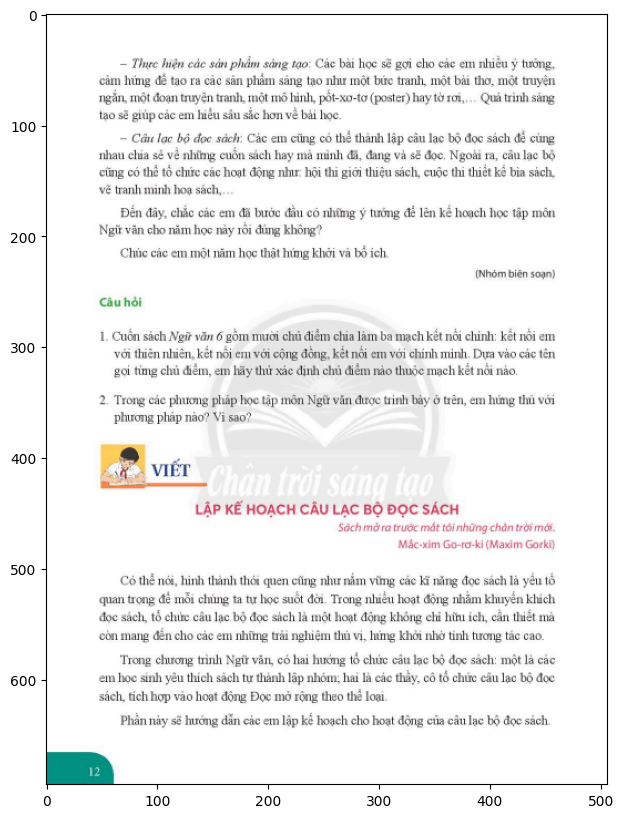

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


TypeError: Qwen2ForCausalLM(
  (model): Qwen2Model(
    (embed_tokens): Embedding(151655, 896)
    (layers): ModuleList(
      (0-23): 24 x Qwen2DecoderLayer(
        (self_attn): Qwen2Attention(
          (q_proj): Linear(in_features=896, out_features=896, bias=True)
          (k_proj): Linear(in_features=896, out_features=128, bias=True)
          (v_proj): Linear(in_features=896, out_features=128, bias=True)
          (o_proj): Linear(in_features=896, out_features=896, bias=False)
        )
        (mlp): Qwen2MLP(
          (gate_proj): Linear(in_features=896, out_features=4864, bias=False)
          (up_proj): Linear(in_features=896, out_features=4864, bias=False)
          (down_proj): Linear(in_features=4864, out_features=896, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): Qwen2RMSNorm((896,), eps=1e-06)
        (post_attention_layernorm): Qwen2RMSNorm((896,), eps=1e-06)
      )
    )
    (norm): Qwen2RMSNorm((896,), eps=1e-06)
    (rotary_emb): Qwen2RotaryEmbedding()
  )
  (lm_head): Linear(in_features=896, out_features=151655, bias=False)
) got multiple values for keyword argument 'return_dict'

In [54]:
test_image = "/content/test_nlp.png"
plt.figure(figsize=(10,10))
plt.imshow(Image.open(test_image))
plt.show()
pixel_values = load_image(test_image, max_num=6).to(torch.bfloat16).cuda()
generation_config = dict(max_new_tokens= 512, do_sample=False, num_beams = 3, repetition_penalty=3.5)

question = '<image>\nCâu hỏi 1 yêu cầu làm gì?'

response = model.chat(tokenizer, pixel_values, question, generation_config)
print(f'User: {question}\nAssistant: {response}')

This guide provided a step-by-step approach to enhancing the InternVL2 model on Viet-Receipt-VQA using LoRA fine-tuning. By following these instructions, you should be able to achieve improved performance in extraction tasks.  Viet-Receipt-VQA is just one example; you can replace it with other downstream datasets for fine-tuning. Happy fine-tuning!

DON'T WORRY ABOUT IT! WE HERE FOR YOU <3

You could find more Vietnamese datasets here.

Check it more about us: [Fifth Civil Defender - 5CD - AI](https://huggingface.co/5CD-AI)

